# Testing the model

Using your solution so far, test the model on new data.

The new data is located in the ‘Bank_data_testing.csv’.

Good luck!

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [2]:
data = pd.read_csv('Bank_data.csv')
data.drop(['Unnamed: 0'],axis=1)

In [6]:
data['y'] = data['y'].map({'yes':1,'no':0})

### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [7]:
y = data['y']
x1 = data['duration']

### Simple Logistic Regression

Run the regression and graph the scatter plot.

In [8]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
log_result = reg_log.fit()
log_result.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Aug 2021   Pseudo R-squ.:                  0.2121
Time:                        16:06:47   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

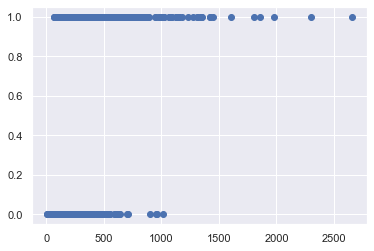

In [10]:
plt.scatter(x1,y)
plt.show()

## Expand the model

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again. 

### Declare the independent variable(s)

In [11]:
x1 = data[['duration','interest_rate','march','credit','previous']]

In [12]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
log_result = reg_log.fit()
log_result.summary()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      512
Method:                           MLE   Df Model:                            5
Date:                Mon, 02 Aug 2021   Pseudo R-squ.:                  0.5143
Time:                        16:08:05   Log-Likelihood:                -174.39
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 1.211e-77
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0211      0.311     -0.068      0.946      -0.631       0.589
duration          0.0070      0.001      9.381      0.000       0.006       0.008
interest_rate    -0.8001      0.089     -8.943      0.000      -0.975      -0.625
march            -1.8322      0.330     -5.556      0.000      -2.478      -1.186
credit            2.3585      1.088      2.169      0.030       0.227       4.490
previous          1.5363      0.501      3.067      0.002       0.554       2.518
=================================================================================
"""

### Confusion Matrix

Find the confusion matrix of the model and estimate its accuracy. 

<i> For convenience we have already provided you with a function that finds the confusion matrix and the model accuracy.</i>

In [13]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [15]:
confusion_matrix(x,y,log_result)

(array([[218.,  41.],
        [ 30., 229.]]),
 0.862934362934363)

## Test the model

Load the test data from the ‘Bank_data_testing.csv’ file provided. (Remember to convert the outcome variable ‘y’ into Boolean). 

### Load new data 

In [17]:
data2 = pd.read_csv('Bank_data_testing.csv')
data2.drop('Unnamed: 0',axis=1)

,interest_rate,credit,march,may,previous,duration,y
0,1.313,0.0,1.0,0.0,0.0,487.0,no
1,4.961,0.0,0.0,0.0,0.0,132.0,no
2,4.856,0.0,1.0,0.0,0.0,92.0,no
3,4.120,0.0,0.0,0.0,0.0,1468.0,yes
4,4.963,0.0,0.0,0.0,0.0,36.0,no
...,...,...,...,...,...,...,...
217,4.963,0.0,0.0,0.0,0.0,458.0,yes
218,1.264,0.0,1.0,1.0,0.0,397.0,yes
219,1.281,0.0,1.0,0.0,0.0,34.0,no
220,0.739,0.0,0.0,2.0,0.0,233.0,no


In [18]:
data2['y'] = data2['y'].map({'yes':1,'no':0})

### Declare the dependent and the independent variables

In [25]:
y = data2['y']
x1 = data2[['duration','interest_rate','march','credit','previous']]

In [26]:
x = sm.add_constant(x1)

Determine the test confusion matrix and the test accuracy and compare them with the train confusion matrix and the train accuracy.

In [27]:
confusion_matrix(x,y,log_result)

(array([[93., 18.],
        [13., 98.]]),
 0.8603603603603603)

### The test accuracy is slightly less accurate than the train accuracy (~0.25% difference).  It makes sense that the training accuracy would be higher as the model will generally overfit to the training data.